<a href="https://colab.research.google.com/github/ReetuAzim/Health-insurance-charge/blob/main/ML_batch50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day1

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset['sex'] = lb.fit_transform(dataset['sex'])
dataset['smoker'] = lb.fit_transform(dataset['smoker'])
dataset['region'] = lb.fit_transform(dataset['region'])

In [ ]:
x=dataset.drop(columns=['charges'])
y=dataset['charges']

In [ ]:
display(x.head())
display(y.head())

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x,y, random_state=42, test_size=0.2)

#model training and evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)


0.7833463107364539

In [ ]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(xtest)
error = mse(ytest, predicted) ** .5
print(error)

5799.587091438356


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
  model.fit(xtrain,ytrain)
  name = model.__class__.__name__
  score = model.score(xtest,ytest)*100
  errors[name] = score

In [ ]:
errors

{'RandomForestRegressor': 86.61643784688093,
 'DecisionTreeRegressor': 72.89489783491962,
 'LinearRegression': 78.33463107364538}

<BarContainer object of 3 artists>

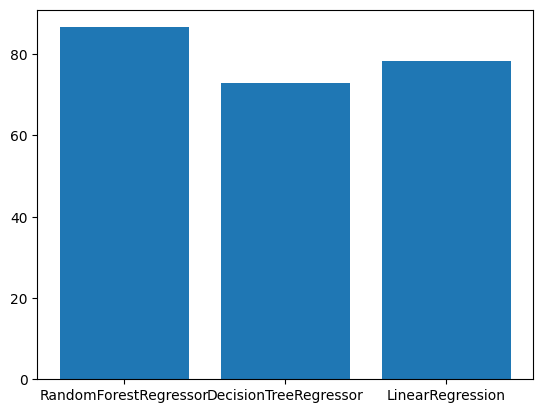

In [ ]:
import matplotlib.pyplot as plt
plt.bar(errors.keys(), errors.values())

/tmp/ipython-input-2985080231.py:24: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


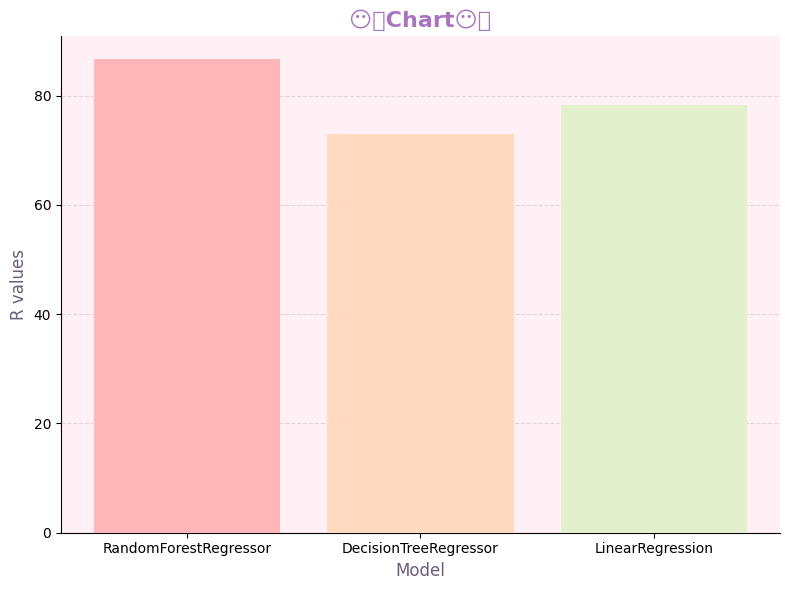

In [ ]:
import matplotlib.pyplot as plt
#Define a cute pastel color pelette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']
# Create the bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(errors.keys(),errors.values(), color=cute_colors[:len(errors)])
#Add rounded edges to bars
for bar in bars:
  bar.set_linewidth(0)
  bar.set_edgecolor('none')
  bar.set_zorder(3)

#Add labels and title with cute fonts
plt.title('😶‍🌫️Chart😶‍🌫️', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Model', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

#Set background color
plt.gca().set_facecolor('#FFF0F5') #Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)
# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()